# Bibliotecas

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtenção dos dados

In [2]:
# !kaggle datasets download -d parisrohan/credit-score-classification

# 2. Importação dos dados

In [3]:
train = pd.read_csv('data/train.csv', low_memory=False)
test =  pd.read_csv('data/test.csv')

In [4]:
pd.set_option('display.max_columns', None)

# 3. Inspeção geral dos dados

| Variável                  | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| ID                        | Identificador único da transação ou registro                               |
| Customer_ID               | Identificador único do cliente                                             |
| Month                     | Mês de referência da análise                                               |
| Name                      | Nome do cliente                                                            |
| Age                       | Idade do cliente                                                           |
| SSN                       | Número de Segurança Social (Social Security Number)                        |
| Occupation                | Ocupação profissional do cliente                                           |
| Annual_Income             | Renda anual do cliente                                                     |
| Monthly_Inhand_Salary      | Salário mensal                                       |
| Num_Bank_Accounts          | Número de contas bancárias que o cliente possui                           |
| Num_Credit_Card            | Número de cartões de crédito que o cliente possui                         |
| Interest_Rate              | Taxa de juros aplicada aos empréstimos ou dívidas                         |
| Num_of_Loan                | Número de empréstimos que o cliente possui                                |
| Type_of_Loan               | Tipo de empréstimo (pessoal, hipotecário, etc.)                           |
| Delay_from_due_date        | Atraso em dias no pagamento após a data de vencimento                     |
| Num_of_Delayed_Payment     | Número de pagamentos atrasados                                             |
| Changed_Credit_Limit       | Alteração no limite de crédito                                             |
| Num_Credit_Inquiries       | Número de consultas de crédito feitas por instituições                    |
| Credit_Mix                 | Mistura de tipos de crédito (cartões, empréstimos, etc.)                  |
| Outstanding_Debt           | Dívida pendente do cliente                                                |
| Credit_Utilization_Ratio   | Proporção da utilização do crédito disponível                             |
| Credit_History_Age         | Tempo total de histórico de crédito do cliente                            |
| Payment_of_Min_Amount      | Se o cliente paga o valor mínimo da fatura (Sim/Não)                      |
| Total_EMI_per_month        | Total de parcelas mensais pagas pelo cliente                              |
| Amount_invested_monthly    | Quantia investida mensalmente pelo cliente                                |
| Payment_Behaviour          | Comportamento de pagamento (padrões e hábitos)                            |
| Monthly_Balance            | Saldo mensal disponível após todas as despesas                            |
| Credit_Score               | Pontuação de crédito do cliente                                           |
| target                     | Variável alvo ou de interesse criada a partir da variável **Credit_Score**|


In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Para deixar o problema ainda mais próximo da área de crédito, optou-se por modificar as classes da seguinte maneira:

* Clientes classificados como `Poor` &#x27A1; `Classe 1` (maus pagadores)
* Clientes classifiados como `Standard` &#x27A1; `Classe 0` (bons pagadores)
* Clientes classifiados como `Good` &#x27A1; `Classe 0` (bons pagadores)

In [6]:
# Antes da modificação
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [7]:
# Modificando as classes para bons e maus pagadores

train['target'] = train['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else 0)

In [8]:
train = train.drop('Credit_Score', axis=1)

In [9]:
# Checando as novas classes
train['target'].value_counts()

target
0    71002
1    28998
Name: count, dtype: int64

In [10]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,target
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [11]:
# Verificando a dimensionalidade dos dados
print(f'Total de linhas: {train.shape[0]}')
print(f'Total de colunas: {train.shape[1]}')

Total de linhas: 100000
Total de colunas: 28


In [12]:
# Aplicar tudo isso nos dados de teste

In [63]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'target'],
      dtype='object')

# 4. EDA

## 4.1 Análises gerais

In [13]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,target
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [14]:
# Checando a proporção das classes

train['target'].value_counts(normalize=True,dropna=False)

target
0    0.71002
1    0.28998
Name: proportion, dtype: float64

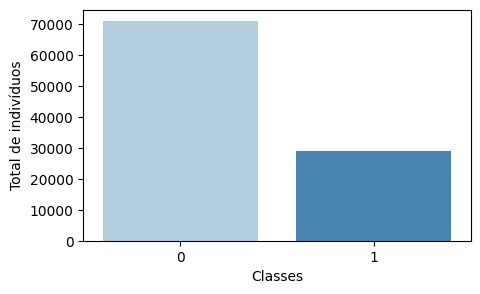

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x=train['target'], hue=train['target'], palette='Blues', legend=False)

plt.xlabel('Classes')
plt.ylabel('Total de indivíduos')
plt.show()

Percebe-se, analisando o gráfico acima, que os dados estão desbalanceados (o que já era esperado), com mais indivíduos bons pagadores do que maus pagadores. Para corrigir esse desbalanceamento, utilizaremos o parâmetro class_weight nos modelos, além de técnicas de escalonamento (scales) que ajudarão a normalizar o target, garantindo que o modelo não seja enviesado para a classe majoritária.

## 4.2 Analisando as variáveis categóricas

### Total de clientes únicos (col `Customer_ID`)

📝 Identificador único da transação ou registro

In [16]:
train['Customer_ID'].nunique(0)

12500

### Análise das safras (col `Month`)

📝 Mês de referência da análise

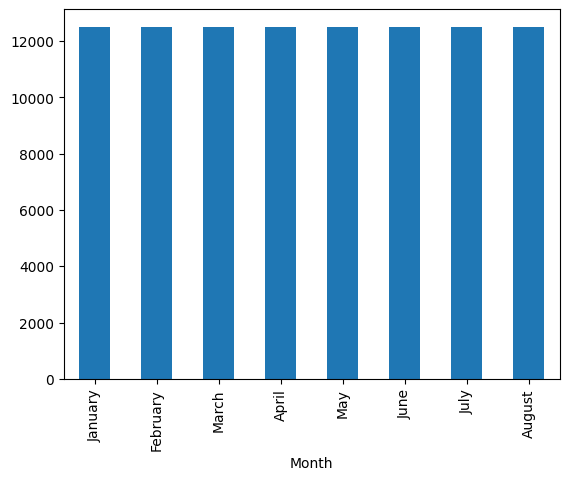

In [17]:
# Volumetria por safra

train['Month'].value_counts().plot(kind='bar');

Não foi percebida nenhuma variação na volumetria de clientes por safra (mês).

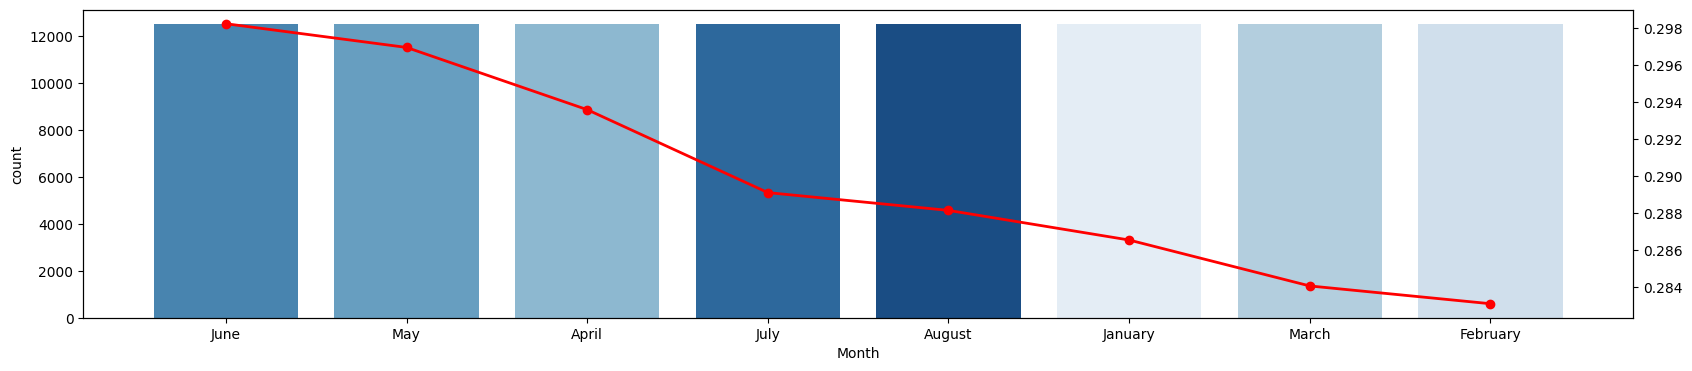

In [18]:
# Taxa de maus por safra

tx_maus_safra = train.groupby(['Month'])['target'].mean().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(20, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Month', ax=ax1, palette='Blues', hue='Month', order=tx_maus_safra.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_safra.index, tx_maus_safra.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

Não foram percebida variações significativas da taxa de maus pagadores por safra, com diferença de apenas 1%.

### Taxa de maus por nome não preenchido (col `Name`)

📝 Nome do cliente

In [19]:
# Criando a flag. OBS: Sem nome preenchido = 1

flag_nome = train['Name'].isna()*1
flag_nome = pd.concat([flag_nome,train['target']], axis=1)

In [20]:
# Taxa de maus por nomes não preenchidos 

tx_maus_nome = flag_nome.groupby(['Name'])['target'].mean().sort_values(ascending=False)

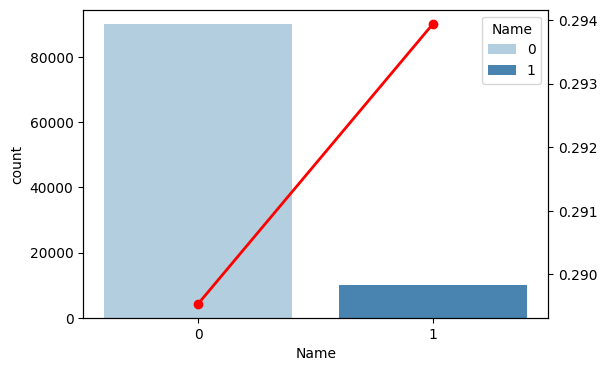

In [21]:
# Gráfico

fig, ax1 = plt.subplots(figsize=(6, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=flag_nome, x='Name', ax=ax1, palette='Blues', hue='Name')

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_nome.index, tx_maus_nome.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [22]:
tx_maus_nome 

Name
1    0.293941
0    0.289541
Name: target, dtype: float64

Percebeu-se, acima, que a taxa de maus é um pouco maior em clientes sem nome cadastrado. No entanto, a diferença é pequena (1%).

### Taxa de maus pagadores por ocupação (col `Occupation`)

📝 Ocupação profissional do cliente

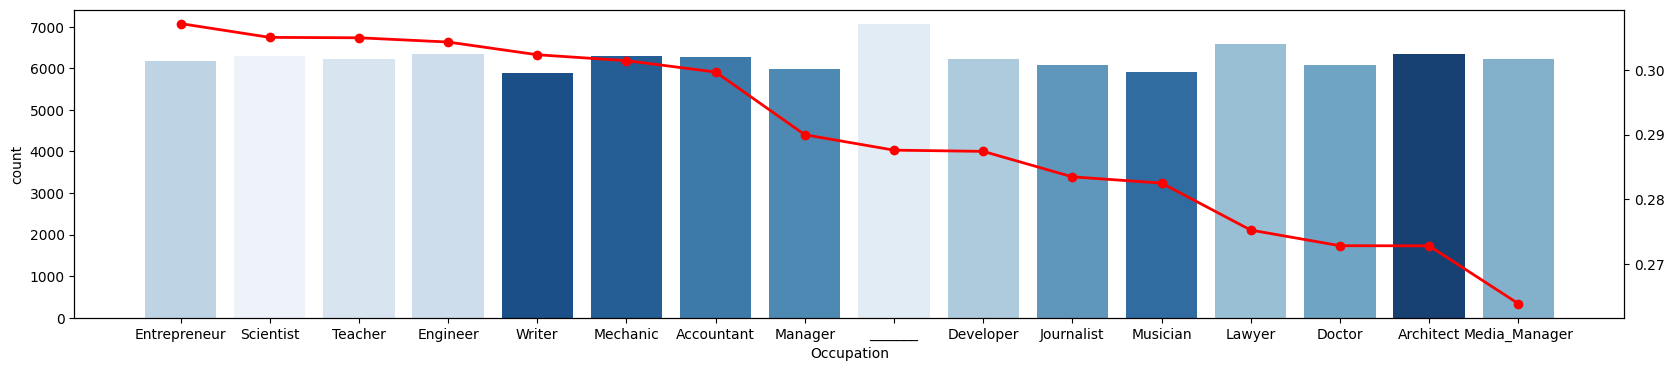

In [23]:
# Taxa de maus por ocupação

tx_maus_ocupacao = train.groupby(['Occupation'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(20, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Occupation', ax=ax1, palette='Blues', hue='Occupation', order=tx_maus_ocupacao.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_ocupacao.index, tx_maus_ocupacao.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [24]:
print(f'Maior taxa de maus: {np.round(tx_maus_ocupacao,2).max()}')
print(f'Menor taxa de maus: {np.round(tx_maus_ocupacao,2).min()}')

Maior taxa de maus: 0.31
Menor taxa de maus: 0.26


A taxa de maus por ocupação varia pouco (diferença de 4%). Em todo caso, percebeu-se que _Media manager_ foi o que apresentou a menor taxa de maus pagadores, com 26%. Já a maior taxa ficou com _Entrepreneur_, com 31%.

### Verificando a taxa de maus por tipo de empréstimo (col `Type_of_Loan` )

📝 Tipo de empréstimo (pessoal, hipotecário, etc)

Percebeu-se, abaixo, que a variável contém bastante texto e que possui várias categorias de empréstimo, algumas vezes combinados. Uma pergunta válida seria: Há uma maior chance de pessoas com mais tipos de empréstimos serem, em maioria, maus pagadores?

In [25]:
train_type_of_loan = train[['Type_of_Loan','target']]

In [26]:
train_type_of_loan.sample(10)

,Type_of_Loan,target
81737,"Debt Consolidation Loan, Not Specified, and Pa...",1
99655,"Debt Consolidation Loan, and Credit-Builder Loan",0
12085,"Credit-Builder Loan, and Mortgage Loan",0
5321,Not Specified,1
75488,"Debt Consolidation Loan, Not Specified, and De...",0
14929,"Student Loan, and Payday Loan",0
75976,"Credit-Builder Loan, Debt Consolidation Loan, ...",1
41514,"Mortgage Loan, Auto Loan, and Mortgage Loan",0
27634,"Credit-Builder Loan, Payday Loan, Home Equity ...",0
61811,"Student Loan, Personal Loan, Credit-Builder Lo...",0


💡 Ideia para trabalhar com essa variável:
* Passar tudo para minúsculo
* Separá-los pela vírgula
* Quantificar os tipos de empréstimo
* Calcular a taxa de maus por tipo de empréstimo
* Transformar cada tipo em uma coluna (?)-(V2 do projeto)

In [27]:
# Passando tudo pra minúsculo
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.lower()

# Exibir todos os empréstimos da linha
pd.set_option('display.max_colwidth', None)

# Tratamento do separador
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(' and ', ',')
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(', ', ',')
train_type_of_loan.loc[:, 'Type_of_Loan'] = train_type_of_loan['Type_of_Loan'].str.replace(',,', ',')

# Separação dos empréstimos
exploded = train_type_of_loan.assign(Type_of_Loan=train_type_of_loan['Type_of_Loan'].str.split(','))\
.explode('Type_of_Loan')

#Remoção de espaços em branco extras nas strings
exploded['Type_of_Loan'] = exploded['Type_of_Loan'].str.strip()

In [28]:
# Quantificação dos tipos de empréstimo

train_type_of_loan['Type_of_Loan'].str.split(',').explode().str.strip().value_counts()

Type_of_Loan
payday loan                40568
credit-builder loan        40440
not specified              39616
home equity loan           39104
student loan               38968
mortgage loan              38936
personal loan              38888
debt consolidation loan    38776
auto loan                  37992
Name: count, dtype: int64

In [29]:
# Taxa de maus por categoria 

maus_por_categoria = exploded.groupby('Type_of_Loan')['target'].mean()
maus_por_categoria

Type_of_Loan
auto loan                  0.394030
credit-builder loan        0.387364
debt consolidation loan    0.393130
home equity loan           0.387531
mortgage loan              0.390718
not specified              0.387369
payday loan                0.392428
personal loan              0.385800
student loan               0.394991
Name: target, dtype: float64

Verificou-se, acima, que a taxa de maus não varia tanto pelo tipo de empréstimo. Talvez seja o caso de checar futuramente se a quantidade total de empréstimos de cada cliente possui alguma relação com a taxa de maus pagadores.

### Verificando a taxa de maus por variedade de tipos de crédito (col `Credit_Mix` )

📝 Mistura de tipos de crédito (cartões, empréstimos, etc)

Essa feature corresponde a uma variedade de tipos de crédito, como cartões de crédito, empréstimos pessoais, e outros. Um "Good" Credit_Mix indica uma combinação saudável de diferentes tipos de crédito, enquanto "Bad" sugere um uso desfavorável.

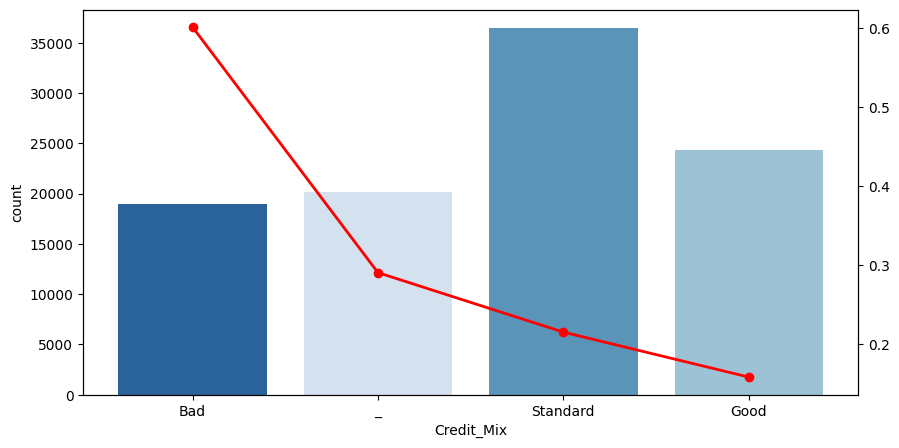

In [30]:
# Taxa de maus por variedade de empréstimo

tx_maus_credit_mix = train.groupby(['Credit_Mix'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Credit_Mix', ax=ax1, palette='Blues', hue='Credit_Mix',order=tx_maus_credit_mix.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_credit_mix.index, tx_maus_credit_mix.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [31]:
tx_maus_credit_mix

Credit_Mix
Bad         0.600822
_           0.290616
Standard    0.215439
Good        0.158647
Name: target, dtype: float64

Percebeu-se que pessoas com uma má/baixa variedade de crédito apresentou uma alta taxa de inadimplência (60%), enquanto pessoas boas apresentaram apenas 15% (algo esperado). Ou seja, há um diferença de 45% na taxa de maus. A variável pode ser considerada uma boa feature para o modelo.

In [32]:
# Ver se está relacionada com a variável acima, de Type of loan

### Analisando o histórico de crédito dos clientes (col `Credit_History_Age`)

📝 Tempo total de histórico de crédito do cliente

A variável abaixo apresenta o tempo total de permanência do cliente a partir da concessão de crédito. Nesse caso, optou-se por substituí-la pelo total de meses, para garantir uma melhor padronização da análise e possível performance do modelo (Será adicionada nos dados de treino na etapa de `Feature engineering`).

In [33]:
train['Credit_History_Age'].value_counts(0)

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [34]:
def convert_to_months(age):
    """Função para converter Years and months em meses"""

    if isinstance(age, str):
        years, months = age.split(' Years and ')
        return int(years) * 12 + int(months.split(' ')[0])
    else:
        return None
        
Credit_History_Age_Months = train['Credit_History_Age'].apply(convert_to_months)

A variável passou a ser analisada no próximo tópico da EDA, referente às análises numéricas (seção 4.3).

### Taxa de maus pagadores por pagamento mínimo da fatura (col `Payment_of_Min_Amount`)

📝 Se o cliente paga o valor mínimo da fatura (Yes/No)

Pagar apenas o valor mínimo da fatura do cartão de crédito significa que o cliente está adiando o pagamento completo do saldo para o futuro. Ou seja, o cliente paga um valor reduzido (ex: uma pequena porcentagem do saldo total ou uma quantia fixa) da fatura atual, no entanto, o saldo restante (não pago) é transferido para o mês seguinte. Esse saldo continua a acumular juros, o que pode aumentar a dívida ao longo do tempo, podendo ser fortemente associada ao aumento da taxa de maus pagadores.

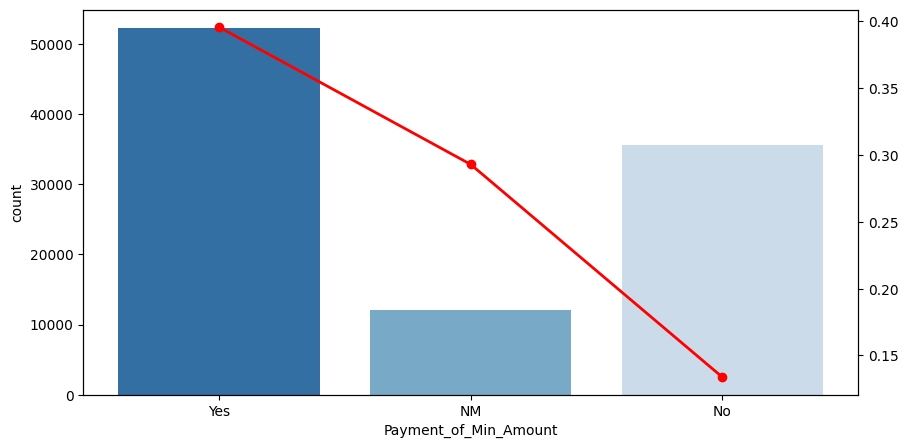

In [35]:
# Taxa de maus por perfil de pagamento

tx_maus_pay_min = train.groupby(['Payment_of_Min_Amount'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_of_Min_Amount', ax=ax1, palette='Blues', hue='Payment_of_Min_Amount', order=tx_maus_pay_min.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pay_min.index, tx_maus_pay_min.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [36]:
# Taxa de maus

np.round(tx_maus_pay_min,2)

Payment_of_Min_Amount
Yes    0.40
NM     0.29
No     0.13
Name: target, dtype: float64

* Houve uma diferença de 27% entre a maior e menor taxa de maus nessa variável;

* Observou-se acima que a taxa de maus é maior em pessoas que utilizam o recurso de pagamento do valor mínimo da fatura, como o esperado, pois o adiamento da dívida com juros mais alto aumenta ainda mais as chances de inadimplência;

* Também foi possível analisar que a taxa de maus é menor em pessoas que não utilizam esse recurso, também como o esperado.

### Verificando abaixo os perfis de pagamento dos clientes (col `Payment_Behavior`)

📝 Comportamento de pagamento (padrões e hábitos)

In [37]:
train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

* High_spent_Small_value_payments: Altos gastos em pagamentos de pequeno valor

* Low_spent_Large_value_payments: Baixos gastos em pagamentos de alto valor, sugerindo uma abordagem cuidadosa em grandes transações

* Low_spent_Medium_value_payments: Baixos gastos em pagamentos de valor médio

* Low_spent_Small_value_payments: Baixos gastos em pagamentos de pequeno valor

* High_spent_Medium_value_payments: Altos gastos em pagamentos de valor médio

* !@9#%8: Valor inválido ou outlier

* High_spent_Large_value_payments: Altos gastos em pagamentos de alto valor

#### Taxa de maus por perfil de pagamento

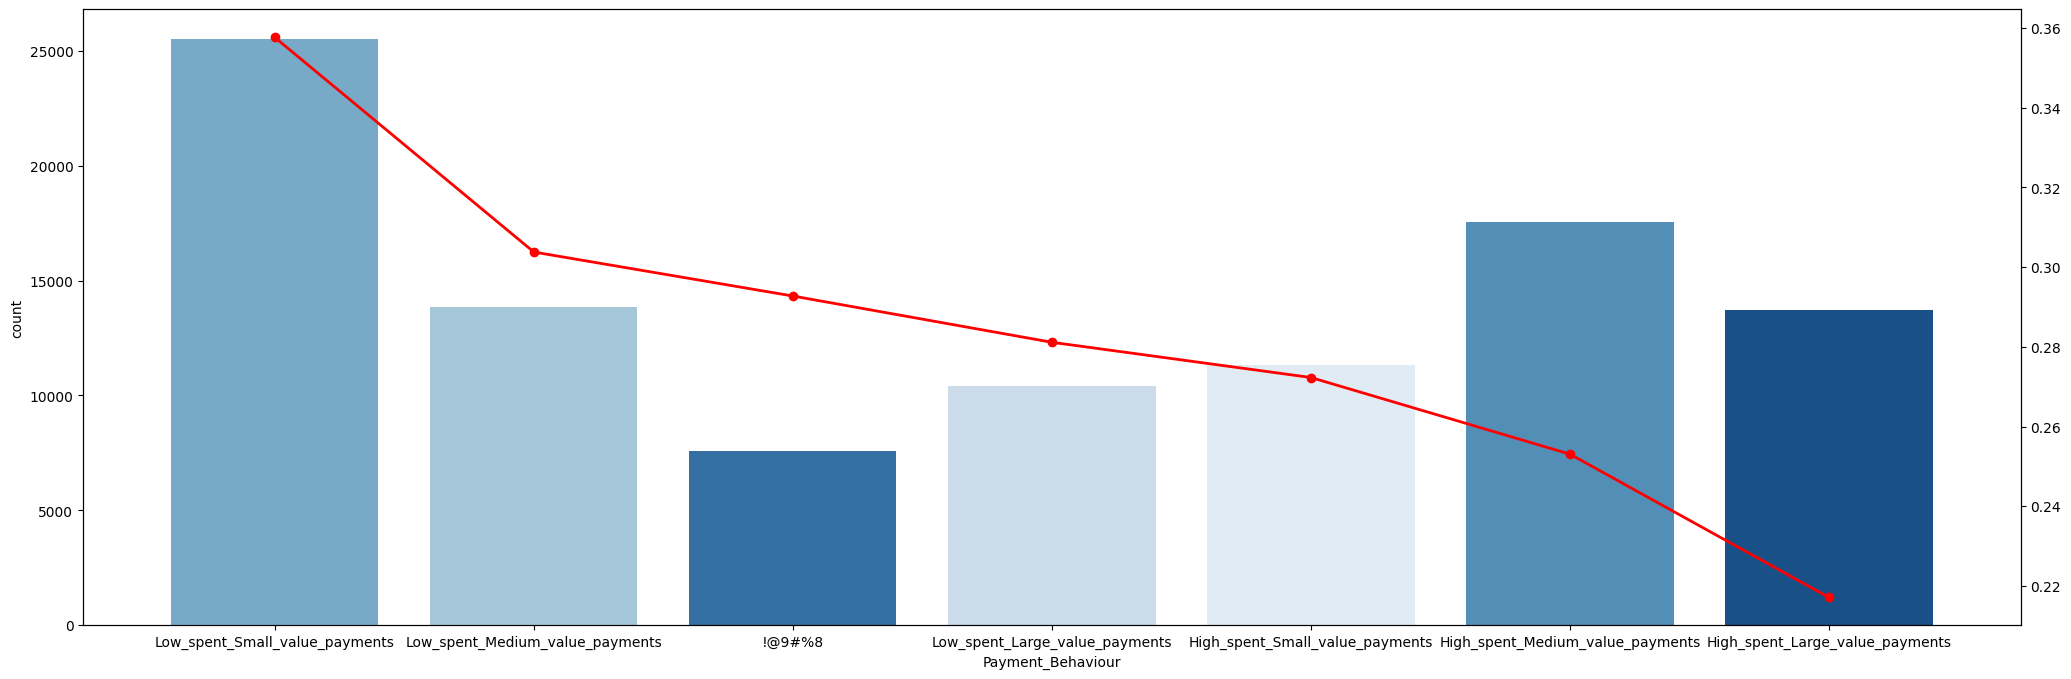

In [38]:
# Taxa de maus por perfil de pagamento

tx_maus_pagamento = train.groupby(['Payment_Behaviour'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(25, 8))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_Behaviour', ax=ax1, palette='Blues', hue='Payment_Behaviour', order=tx_maus_pagamento.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pagamento.index, tx_maus_pagamento.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [39]:
np.round(tx_maus_pagamento,2) 

Payment_Behaviour
Low_spent_Small_value_payments      0.36
Low_spent_Medium_value_payments     0.30
!@9#%8                              0.29
Low_spent_Large_value_payments      0.28
High_spent_Small_value_payments     0.27
High_spent_Medium_value_payments    0.25
High_spent_Large_value_payments     0.22
Name: target, dtype: float64

* Houve uma diferença de 14% entre a maior e menor taxa de maus

* Observou-se acima que a taxa de maus é maior em pessoas que possuem baixos gastos, destacando-se os baixos gastos em pagamentos de pequeno valor (_Low_spent_Small_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda menor.

* Também foi possível analisar que a taxa de maus é menor em pessoas que possuem altos gastos, destacando-se os clientes de altos gastos em pagamentos de alto valor (_High_spent_Large_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda maior.

## 4.3 Analisando as variáveis numéricas

### Distribuição geral das variáveis numéricas

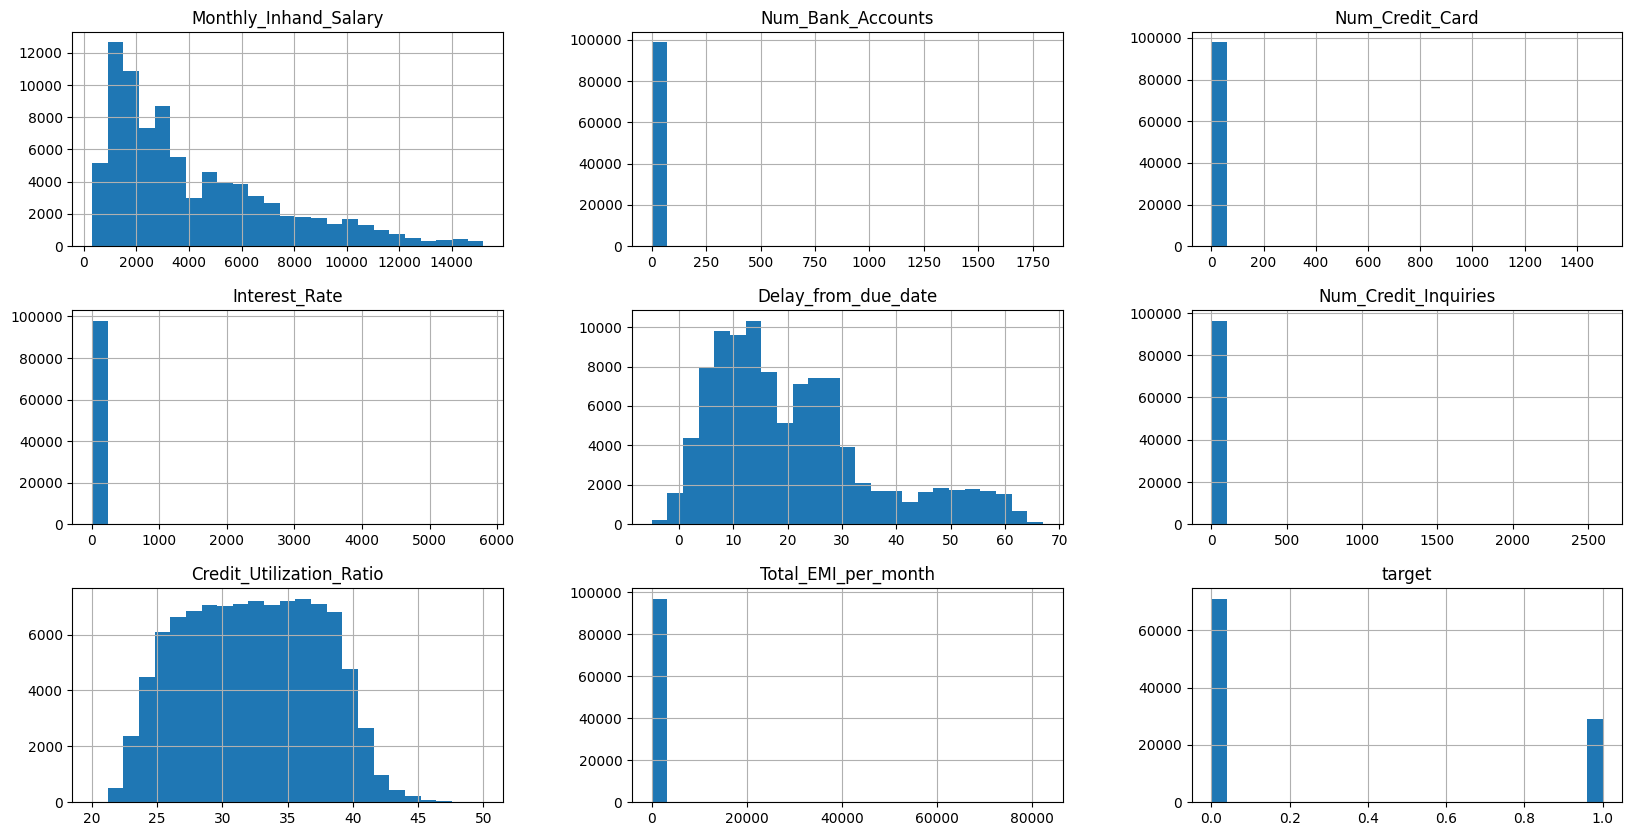

In [40]:
# Selecionando apenas as variáveis numéricas
num_train = train.select_dtypes([int,float])

# Plotando as distribuições
num_train.hist(figsize=(20,10),bins=25);

OBS: nem todas as variáveis numéricas estão indicadas acima, pois algumas estavam como 'object'.

### Analisando o histórico de crédito dos clientes em meses (col `Credit_History_Age`)

📝 Tempo total de histórico de crédito do cliente (em meses)

A variável era categórica (seção x). Foi analisada, abaixo, em faixas, após ter sido transformada em meses.

In [41]:
# Ordenação em 5 partes iguais, montando uma "faixa" de meses

credit_hist_age_bins = pd.qcut(Credit_History_Age_Months, q=5)

# Concatenando com o target

df_credit_hist_age = pd.concat([credit_hist_age_bins,train['target']],axis=1)

# Taxa de maus por faixa de histórico de crédito

df_credit_hist_age.groupby(['Credit_History_Age'],observed=True)['target'].mean()

Credit_History_Age
(0.999, 124.0]    0.492707
(124.0, 196.0]    0.442194
(196.0, 243.0]    0.277597
(243.0, 323.0]    0.123161
(323.0, 404.0]    0.111080
Name: target, dtype: float64

Percebe-se que clientes com menor tempo de histórico de crédito (em meses) apresentam uma maior taxa de maus pagadores, o que era esperado. Já os clientes com maior tempo de histórico têm uma taxa de inadimplência menor. Isso faz sentido, pois clientes com mais tempo de crédito tendem a ser mais confiáveis, tornando menos provável o perfil de inadimplência.

In [42]:
# Gráfico disso aqui

In [43]:
# Testar adicionar a variavel em faixas de histórico ou ela bruta (total de meses) na hora da modelagem

### Analisando a taxa de maus por idade (col `Age`)

📝 Idade do cliente

In [109]:
# Preparando a variável para ser analisada
age_hist = train[['Age','target']]

# Removendo underscore _
age_hist.loc[:, 'Age'] = age_hist['Age'].str.replace('_', '', regex=False)

# Transformando em int
age_hist.loc[:,'Age'] = age_hist['Age'].astype(int)

<Axes: xlabel='Age', ylabel='Count'>

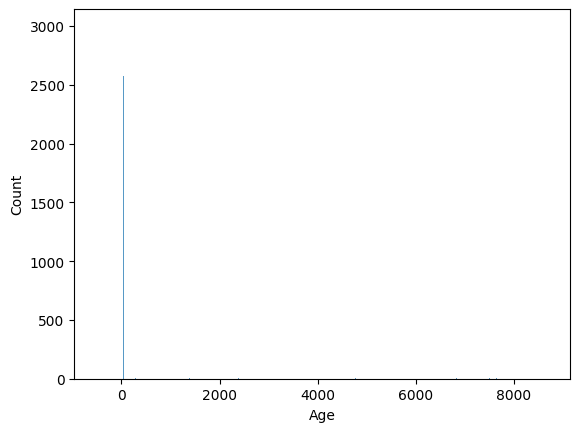

In [98]:
sns.histplot(data=age_hist, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

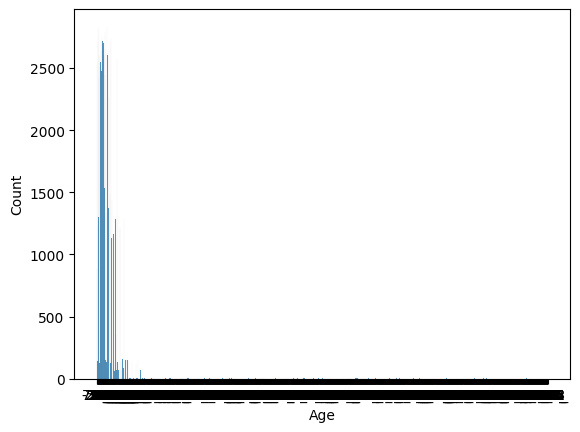

In [99]:
sns.histplot(data=train, x='Age')

In [101]:
train['Age'].max()

'995'

In [102]:
train['Age'].min()

'-500'

In [86]:
(age_hist['Age'] == '28_').sum()

np.int64(0)

### Analisando a renda anual (col `Annual_Income`)

📝 Renda anual do cliente

In [112]:
annual_income = train[['Annual_Income','target']]

# Removendo underscore _
annual_income.loc[:,'Annual_Income'] = annual_income.loc[:,'Annual_Income'].str.replace('_', '', regex=False)

# Transformando em float
annual_income.loc[:,'Annual_Income'] = annual_income['Annual_Income'].astype(float)

In [113]:
# Ordenação em 10 partes iguais, montando uma "faixa" de rendas

annual_income_bins = pd.qcut(annual_income['Annual_Income'], q=10)

# Concatenando com o target

df_annual_income = pd.concat([annual_income_bins,annual_income['target']],axis=1)

# Taxa de maus por faixa de histórico de crédito

df_annual_income.groupby(['Annual_Income'],observed=True)['target'].mean()

Annual_Income
(7005.929, 14293.345]      0.419274
(14293.345, 17642.1]       0.404379
(17642.1, 21338.55]        0.409841
(21338.55, 31225.44]       0.164233
(31225.44, 37578.61]       0.247800
(37578.61, 49661.1]        0.325002
(49661.1, 64915.92]        0.373637
(64915.92, 82334.016]      0.274637
(82334.016, 113085.87]     0.125712
(113085.87, 24198062.0]    0.155209
Name: target, dtype: float64

Observou-se, acima, que a taxa de maus pagadores é maior entre clientes com renda anual mais baixa, algo que faz sentido, pois sabe-se que pessoas com renda menor possuem uma maior probabilidade de atrasos ou inadimplência em pagamentos. Por outro lado, foi possível ver que os clientes com renda mais alta obtiveram uma taxa de inadimplência menor. A diferença percentual foi de 21,41%.

### Analisando a variável de salário mensal (col `Monthly_Inhand_Salary`)

📝 Salário mensal do cliente

In [44]:
# Ordenação em 5 partes iguais, montando uma "faixa" de salários

monthly_inhand_salary = pd.qcut(train['Monthly_Inhand_Salary'], q=5)

# Concatenando com o target

df_monthly_inhand_salary = pd.concat([monthly_inhand_salary,train['target']],axis=1)

# Taxa de maus por faixa de salário mensal

df_monthly_inhand_salary.groupby(['Monthly_Inhand_Salary'],observed=True)['target'].mean()

Monthly_Inhand_Salary
(303.644, 1468.065]     0.413854
(1468.065, 2559.818]    0.286261
(2559.818, 4039.538]    0.281640
(4039.538, 6710.36]     0.327508
(6710.36, 15204.633]    0.140193
Name: target, dtype: float64

Como o esperado, pessoas com a faixa salarial menor estão categorizados com a maior taxa de inadimplência. Enquanto os de maior renda posuem a menor taxa, com uma diferença percentual de 27%.

In [45]:
# Gráfico disso aqui

### Analisando a variável de total de contas bancárias (col `Num_Bank_Accounts`)

📝 Número de contas bancárias que o cliente possui

In [46]:
# Ordenação em 5 partes iguais, montando uma "faixa" de quantidades de contas bancárias

num_bank_accounts = pd.qcut(train['Num_Bank_Accounts'], q=5)

# Concatenando com o target

df_num_bank_accounts = pd.concat([num_bank_accounts,train['target']],axis=1)

# Taxa de maus por faixa de quantidades de contas bancárias

df_num_bank_accounts.groupby(['Num_Bank_Accounts'],observed=True)['target'].mean()

Num_Bank_Accounts
(-1.001, 3.0]    0.158291
(3.0, 5.0]       0.160097
(5.0, 6.0]       0.358819
(6.0, 8.0]       0.368454
(8.0, 1798.0]    0.586149
Name: target, dtype: float64

Percebeu-se, acima, que a taxa de maus pagadores é maior em indivíduos com maior quantidade de contas bancárias, enquanto a taxa de maus é menor em indivíduos com menor quantidade de contas bancárias. Isso faz algum sentido, pois indivíduos sem um credit score bom podem tentar obter crédito em vários tipos de contas diferentes. A diferença percentual é de 43%.

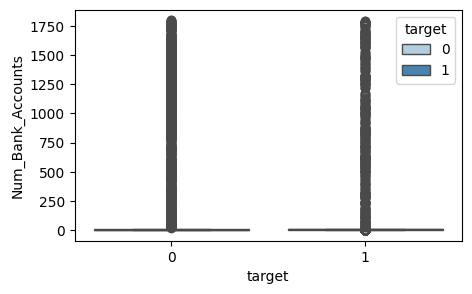

In [47]:
plt.figure(figsize=(5,3))
sns.boxplot(x='target',y='Num_Bank_Accounts', data=train,hue='target', palette='Blues')
plt.show()

In [48]:
train['Num_Bank_Accounts'].min()

np.int64(-1)

In [49]:
train['Num_Bank_Accounts'].max()

np.int64(1798)

In [50]:
# Tem alguma coisa errada com essa quantidade de contas bancárias. Não é possível ter -1 Ou 1798 contas bancárias. Investigar isso
# Tratar outliers

In [51]:
# Gráfico disso aqui

### Analisando a variável de total de cartões de crédito (col `Num_Credit_Card`)

📝 Número de cartões de crédito que o cliente possui

In [52]:
# Ordenação em 5 partes iguais, montando uma "faixa" de salários

num_credit_card = pd.qcut(train['Num_Credit_Card'], q=5)

# Concatenando com o target

df_num_credit_card = pd.concat([num_credit_card, train['target']], axis=1)

# Taxa de maus por número de cartão de crédito

df_num_credit_card.groupby('Num_Credit_Card',observed=True)['target'].mean()

Num_Credit_Card
(-0.001, 4.0]    0.121705
(4.0, 5.0]       0.282626
(5.0, 6.0]       0.302736
(6.0, 7.0]       0.311586
(7.0, 1499.0]    0.581236
Name: target, dtype: float64

Seguindo a mesma lógica da análise anterior, quanto maior a quantidade de cartões de crédito, percebe-se uma maior taxa de maus pagadores.E quanto menor a quantidade, menor a taxa de maus pagadores. A diferença percentual é de 46%.

In [53]:
# Inconsistência abaixo:

In [54]:
train['Num_Credit_Card'].min()

np.int64(0)

In [55]:
train['Num_Credit_Card'].max()

np.int64(1499)

In [56]:
train['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [57]:
# Tem alguma coisa errada nessa coluna também. Valores muito discrepantes e alguns muito altos pra número de cartões de crédito
# Tratar outliers

### Analisando a variável de taxa de juros (col `Interest_Rate`)

📝 Taxa de juros aplcada aos empréstimos ou dívidas

In [58]:
# Ordenação em 5 partes iguais, montando uma "faixa" de juros

interest_rate = pd.qcut(train['Interest_Rate'], q=5)

# Concatenando com o target

df_interest_rate = pd.concat([interest_rate, train['target']], axis=1)

# Taxa de maus por taxa de juros aplicada aos empréstimos/dívidas

df_interest_rate.groupby('Interest_Rate',observed=True)['target'].mean()

Interest_Rate
(0.999, 6.0]      0.135828
(6.0, 11.0]       0.131923
(11.0, 16.0]      0.186726
(16.0, 23.0]      0.404560
(23.0, 5797.0]    0.604826
Name: target, dtype: float64

Percebeu-se que o grupo com maior taxa de juros possui uma maior taxa de maus pagadores e vice-versa. A diferença percentual da menor para a maior taxa de maus pagadores foi de 47%.

In [59]:
# OBS: aumentar pra 10 bins?

### Analisando os empréstimos (col `Num_of_Loan`)

📝

### Analisando os atrasos de pagamento em dias (col `Delay_from_due_date`)

📝

### Analisando o total de atrasos de pagamento (col `Num_of_Delayed_Payment`)

📝

### Analisando as alterações do limite (col `Changed_Credit_Limit`)

📝

### Analisando as consultas de crédito (col `Num_Credit_Inquiries`)

📝

### Analisando as dívidas dos clientes (col `Outstanding_Debt`)

📝

### Analisando o crédito disponível (col `Credit_Utilization_Ratio`)

📝

### Analisando as parcelas mensais (col `Total_EMI_per_month`)

📝

### Analisando quantia investida (col `Amount_invested_monthly`)

📝